In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("4_stocks_1995_2017.csv", index_col="Date", parse_dates = ["Date"])
data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.960464,2.498429,5.091914,4.479902
1995-01-04,8.888638,2.516591,5.228918,4.479902
1995-01-05,8.762941,2.475080,5.183250,4.490882
1995-01-06,8.780898,2.516591,5.183250,4.468922
1995-01-09,8.744981,2.501024,5.274583,4.425002


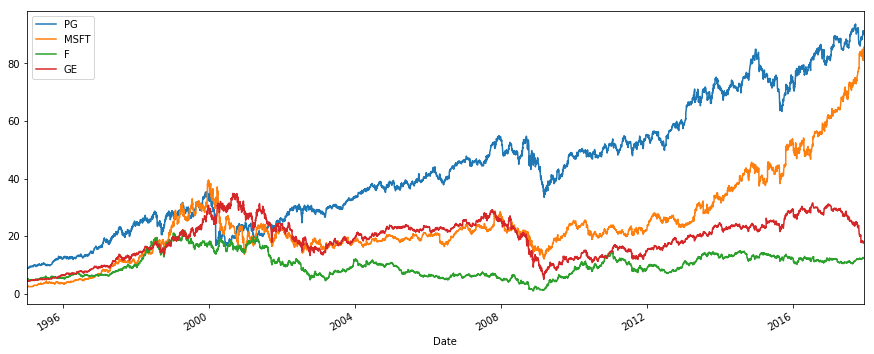

In [7]:
data.plot(figsize=(15, 6))  
plt.show()
#here, we don't have the same starting point for all companies. So, can't compare. Therefore, we do normalization.

## Normalization to 100

In [8]:
data.iloc[0]

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03 00:00:00, dtype: float64

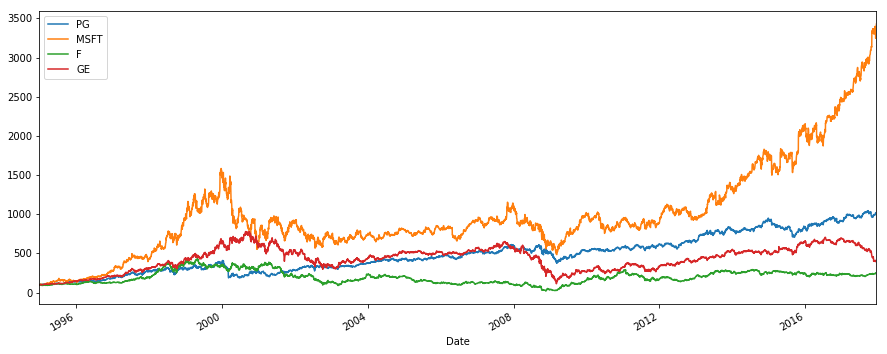

In [4]:
(data / data.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

Microsoft is a fair winner. From 1995 to 2007 (the moment of the global financial crisis), GE performed better than PG. But, PG shares have cost more ever since. Ford performed worst of all.

## Calculating the Return of a Portfolio of Securities

In [9]:
returns = (data/data.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [12]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.125201
MSFT    0.202795
F       0.118984
GE      0.102481
dtype: float64

In [10]:
weights = np.array([0.25,0.25,0.25,0.25])  #assuming equal weights

In [13]:
np.dot(annual_returns, weights)

0.1373651600530974

In [15]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)*100) + "%"
pfolio_1

'13.737%'

In [18]:
weights_2 = np.array([0.4,0.4,0.15,0.05])
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)*100) + "%"

In [19]:
print pfolio_1
print pfolio_2

13.737%
15.417%
